In [10]:
import tensorflow as tf
tf.reset_default_graph() 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
input_data = tf.placeholder(dtype = tf.float32, shape = None) 
output_data = tf.placeholder(dtype = tf.float32, shape = None) 

a = tf.Variable(1, dtype = tf.float32)
b = tf.Variable(1,dtype = tf.float32)
c = tf.Variable(1,dtype = tf.float32)


[-4 -3 -2 -1  0  1  2  3  4] 
 [-64 -27  -8  -1   0   1   8  27  64]
[0.99999774, 0.99999774, 0.99999774]
[0.9994767, 0.99947494, 0.99947643]
[0.99887, 0.99886316, 0.99886906]
[0.9981919, 0.99817467, 0.9981894]
[0.9974507, 0.9974175, 0.99744576]
[0.996653, 0.9965975, 0.9966452]
[0.99580497, 0.9957192, 0.99579287]
[0.9949111, 0.99478674, 0.99489313]
[0.9939754, 0.9938027, 0.99395025]
[0.99300164, 0.9927702, 0.9929677]
82.74623


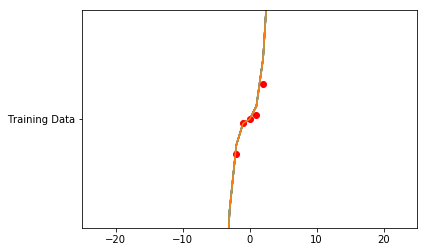

In [34]:
#parabola slope: ax^2 + bx + c
model_op = a * (input_data **3) + (b * input_data**2) + (c * input_data)
error = model_op - output_data
sqr_error = tf.square(error)
                
loss = tf.reduce_mean(sqr_error)
                
learning_rate = 0.005

#in order to minimize the loss
optimizer = tf.train.AdadeltaOptimizer(learning_rate)

train = optimizer.minimize(loss) 
#initialize the variables and run the session
init = tf.global_variables_initializer()



x_values = np.arange(-4,5)
print(x_values,"\n",y_values)
y_values = np.power(x_values,3)

fig = plt.figure()
ax = fig.add_subplot(111)
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(2000):
        sess.run(train, feed_dict ={input_data: x_values, output_data: y_values})
        if i%200== 0:
            print(sess.run([a,b,c]))
            ax.set_xlim(-25,25)
            ax.set_ylim(-25,25)
            ax.plot(x_values, sess.run(model_op, feed_dict ={input_data: x_values}))
             
    print(sess.run(loss, feed_dict ={input_data: x_values, output_data: y_values}))
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(model_op, feed_dict ={input_data: x_values}))
                
plt.show()
                
